# Oxfort Stringency Index
Deze maakt gebruik van de volgende pagina: https://covidtracker.bsg.ox.ac.uk. 

De waarden zijn gedefineerd op de volgende pagina: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md 

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline


In [17]:
sheets = pd.read_excel('./2. OxCGRT_timeseries_all.xlsx', sheet_name=None)

In [18]:
nl_dict = {}
for s in sheets.keys():
    sheet = sheets[s].set_index('country_code').drop(columns=['country_name'])
    nl_dict[s] = sheet.loc['NLD']

In [19]:
measures = pd.DataFrame(nl_dict)
measures.index = pd.to_datetime(measures.index)
measures.head()

stringency_index  government_response_index  \
2020-01-01               0.0                        0.0   
2020-01-02               0.0                        0.0   
2020-01-03               0.0                        0.0   
2020-01-04               0.0                        0.0   
2020-01-05               0.0                        0.0   

            containment_health_index  economic_support_index  \
2020-01-01                       0.0                     0.0   
2020-01-02                       0.0                     0.0   
2020-01-03                       0.0                     0.0   
2020-01-04                       0.0                     0.0   
2020-01-05                       0.0                     0.0   

            c1_school_closing  c1_flag  c2_workplace_closing  c2_flag  \
2020-01-01                0.0      NaN                   0.0      NaN   
2020-01-02                0.0      NaN                   0.0      NaN   
2020-01-03                0.0      NaN                   0.0      NaN   
2020-01-04                0.0      NaN                   0.0      NaN   
2020-01-05                0.0      NaN                   0.0      NaN   

            c3_cancel_public_events  c3_flag  ...  \
2020-01-01                      0.0      NaN  ...   
2020-01-02                      0.0      NaN  ...   
2020-01-03                      0.0      NaN  ...   
2020-01-04                      0.0      NaN  ...   
2020-01-05                      0.0      NaN  ...   

            h1_public_information_campaigns  h1_flag  h2_testing_policy  \
2020-01-01                              0.0      NaN                0.0   
2020-01-02                              0.0      NaN                0.0   
2020-01-03                              0.0      NaN                0.0   
2020-01-04                              0.0      NaN                0.0   
2020-01-05                              0.0      NaN                0.0   

            h3_contact_tracing  h6_facial_coverings  h6_flag  \
2020-01-01                 0.0                  0.0      NaN   
2020-01-02                 0.0                  0.0      NaN   
2020-01-03                 0.0                  0.0      NaN   
2020-01-04                 0.0                  0.0      NaN   
2020-01-05                 0.0                  0.0      NaN   

            h7_vaccination_policy  h7_flag  confirmed_cases  confirmed_deaths  
2020-01-01                    0.0      NaN              NaN               NaN  
2020-01-02                    0.0      NaN              NaN               NaN  
2020-01-03                    0.0      NaN              NaN               NaN  
2020-01-04                    0.0      NaN              NaN               NaN  
2020-01-05                    0.0      NaN              NaN               NaN  

[5 rows x 32 columns]

In [20]:
not_val_cols = set([c for c in measures if ("_flag" in c or 
                                        "_index" in c or 
                                        "confirmed_" in c)])
not_val_cols -= set(['stringency_index'])
measures_noflags = measures.drop(columns=list(not_val_cols))

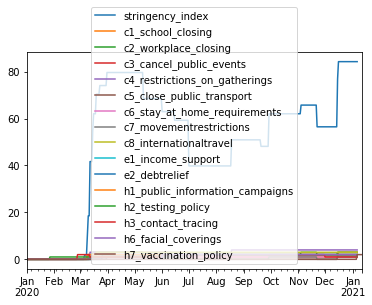

In [30]:
measures_noflags.to_csv('./data-oxford-measures-2020-2021.ts.csv')
measures_noflags.plot()

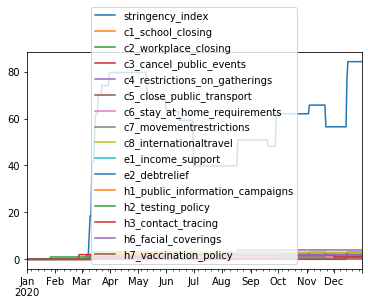

In [32]:
measures_noflags_2020 = measures_noflags[(measures_noflags.index > '31-12-2019') & 
                                         (measures_noflags.index < '01-01-2021')]
measures_noflags_2020.to_csv('./data-oxford-measures-2020.ts.csv')
measures_noflags_2020.plot()